<a href="https://colab.research.google.com/github/vachkim/STUDY/blob/master/VISUALIZATION/Stu_SEABORN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) 머리말
시각화 공부를 위한 [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) 정리본이다

순서와 데이터는 철저하게 튜토리얼 상의 내용을 참조했다

## 1) 통계적 관계 나타내기(Statistical Relationships)
- 여러 변수 간의 통계적 관계를 보여주는 그래프를 그리는 방법이다
- 주로 relplot()(관계도표)를 활용해 그래프를 그린다 _ 산점도와 선형그래프의 두 가지 방법이 있다
- relplot은 FacetGrid에 관계형 plot(선,점)을 그려주는 기능을 수행한다
- relplot은 다음과 같은 옵션을 가진다
```
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
```

#### 잠깐! Facetgrid란
- Facetgrid = X,Y축을 갖춘 갖춘 grid(격자판)으로 관계를 표시하는데 사용된다 
- Facetgrid는 단독적으로 사용되기 보다는 
- mapping을 통해 relplot/catplot과 같은 figure-level interface와 함께 사용하는 것이 일반적이다

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid') #이건 주석으로 빼줘도 차이가 없는데

### 1-1) 산점도(Scatter Plots) 
 - 점을 찍어 변수 간의 관계를 파악할 수 있다
 - 두 변수가 모두 숫자형일 때 사용 가능하다
 - relplot()의 기본형은 산점도이며 부여할 수 있는 옵션은 다음과 같다
 ```
 seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
 ```

- 이제 seaborn에서 기본으로 제공해주는 tips데이터를 활용해 산점도를 그려보자

In [ ]:
tips = sns.load_dataset('tips') 
print(tips.head(3))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3


- 산점도를 그리는 방법은 기본적으로 아래와 같이 간단하다
- x,y축에 입력할 변수와 변수명이 포함되어 있는 데이터셋을 함께 넣어주면 된다

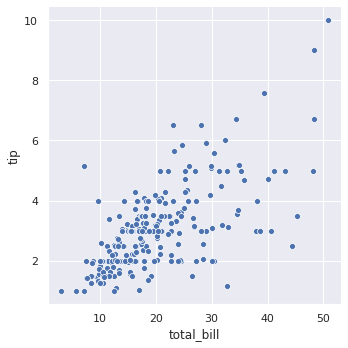

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips);

- 점의 색깔(Hue)을 통해 제3의 변수 또한 표현할 수 있다 _ 보통 범주형 변수를 Hue로 표시한다
- Hue의 기본 값은 seaborn의 qualitative palette가 적용된다는 것을 알아두자

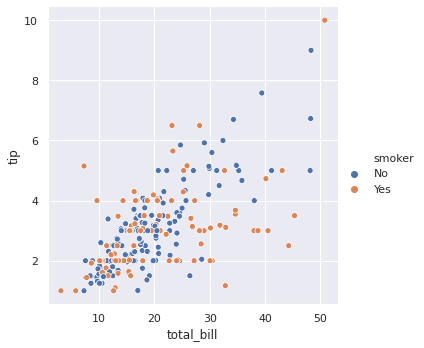

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',data=tips);
#제 3의 변수인 smoker여부를 hue로 표시

- Hue로 숫자형 변수를 나타내는 것도 물론 가능하다
- 이 경우에는 Hue의 기본색으로서 sequential palette가 적용된다

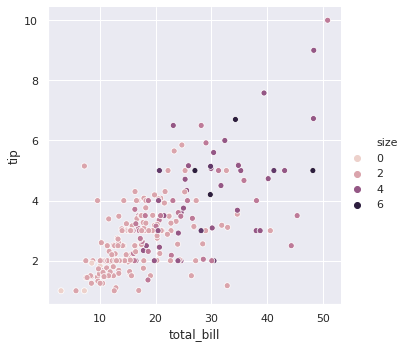

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='size',data=tips);

- Hue값에 적용되는 색 조합을 임의로 선택할 수도 있다

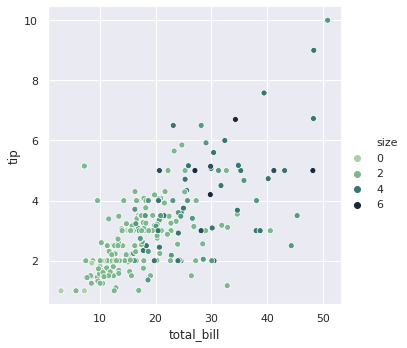

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

- 색깔 뿐만 아니라 점의 모양(Style) 또한 구분을 위한 방법으로 활용 가능하다

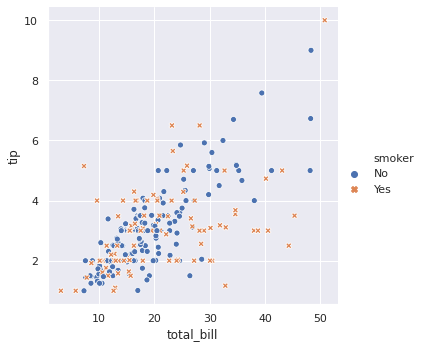

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',style='smoker',data=tips);
#smoker를 좀 더 명확히 구분하기 위해 style에 차이를 둠

- 다음과 같이 Style을 통해 제4의 변수를 표현하는 것도 가능하다
- 하지만 산점도의 경우 Style은 가시적인 차이가 두드러지지 않으므로 사용을 지양하는 것이 좋다

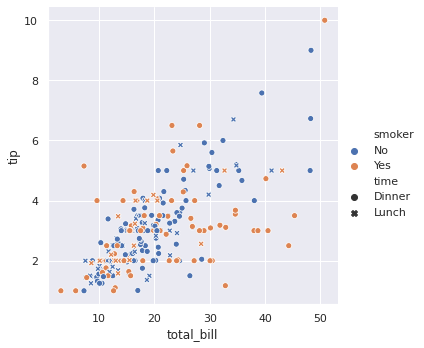

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',style='time',data=tips);

- 제3의 변수를 나타낼 때 사용하는 또다른 방법은 원의 크기(Size)이다
- Size는 숫자인만큼 숫자형 변수를 나타낼 때 사용하는 것이 적합하다

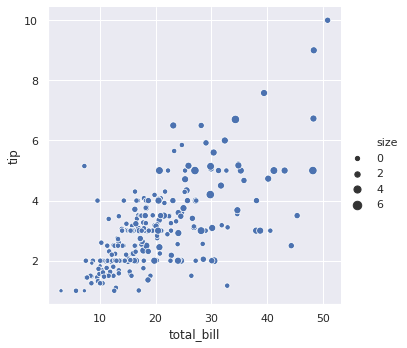

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

- 위처럼 크기 상의 차이가 명확하지 않을 경우 Sizes를 통해 크기 변화의 범주를 지정해 줄 수도 있다

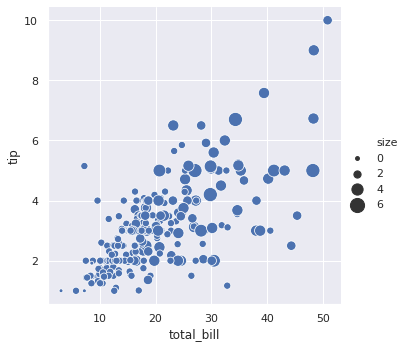

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

### 1-2) 선형그래프(Line Plots)
- 산점도와 달리 선형그래프는 값의 지속적인 변화형태를 나타낸다
- 그렇기 때문에 시간의 흐름에 따른 변화를 확인하고 싶을 때 주로 사용된다
- relplot(kind='line')이나 lineplots()을 통해 그릴 수 있으며 옵션은 다음과 같다
```
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
```

- Lineplot은 연속적인 행태의 변화를 보여주기 때문에 다음과 같은 방법으로 데이터를 구성한다
- 500개의 연속적인 time값과 500개의 랜덤한 수의 총합을 바탕으로 데이터프레임을 만든다

In [ ]:
df = pd.DataFrame({'time':np.arange(500),'value':np.random.randn(500).cumsum()})
#cumsum = cumulative sum of the elements along a given axis.
print(df.head(3))

   time     value
0     0  0.146436
1     1  1.356847
2     2  1.232622


- 그래프를 그리는 방법은 산점도와 동일하다

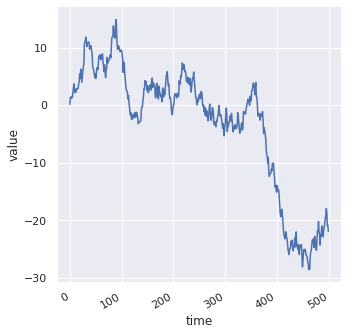

In [ ]:
g = sns.relplot(x='time',y='value',kind='line',data=df)
g.fig.autofmt_xdate()
#autofmt_xdate를 사용하면 x축의 시간값이 서로 겹쳐서 표시되지 않도록 값을 정렬한다

- 위와 달리 x축의 값이 순차적이지 않은 경우도 있다
- 아래의 데이터 프레임은 무작위적인 순서로 500개의 값을 뽑아 X,Y에 저장한 데이터프레임이다

In [ ]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
print(df.head(3))

          x         y
0 -1.128405  0.794253
1 -1.277226  1.117831
2 -0.284926  2.728545


- 이때 선형그래프가 가진 기본적인 기능 중 하나는 그래프를 그리기 이전에
- 스스로 X의 값을 순차적으로 배열(Sort)한다는 것이다

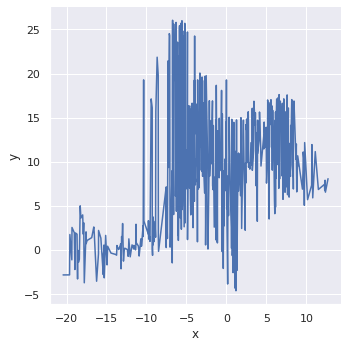

In [ ]:
sns.relplot(x="x", y="y", kind="line", data=df);

- Sort=False로 옵션값을 부여하면 정렬되지 않은 상태에서 그래프를 그리게 된다

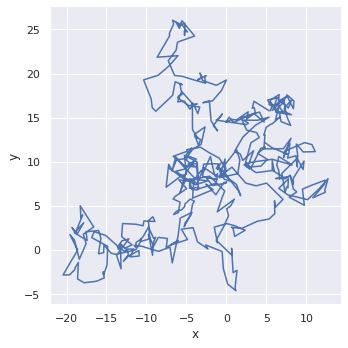

In [ ]:
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

- 복잡한 데이터셋은 하나의 X값에 대해 다수의 측정값을 가지기도 한다
- 실제로 아래의 데이터셋은 동일한 timepoint에 대해 여러 개의 signal값을 부여한다

In [ ]:
fmri = sns.load_dataset('fmri')
print(fmri.head(10))
#아래를 보면 같은 timepoint에 signal값이 모두 다른 것을 확인할 수 있다

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513
6      s8         18  stim  parietal -0.064408
7      s7         18  stim  parietal -0.060526
8      s6         18  stim  parietal -0.007029
9      s5         18  stim  parietal -0.040557


- 이때 선형그래프는 여러 개의 Y값의 평균을 구하고 평균을 바탕으로 95% 신뢰구간 내에 해당하는 값들을 표시해준다
- 이러한 기능을 데이터집합(aggregation)이라고 한다

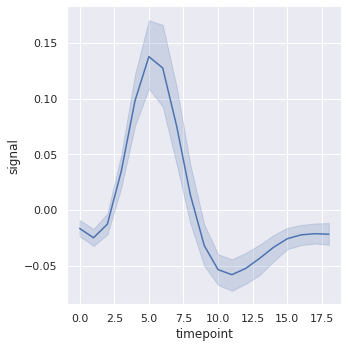

In [ ]:
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri);

- 위와 같은 표를 그리기 위해 seaborn은 자체적으로 복원추출을 해 값을 계산한다
- 여기서 복원추출에 해당하는 옵션값이 Ci이다
- 따라서 ci=None으로 옵션을 부여하게 되면 복원추출을 하지 않고 처음 구한 표본의 평균값에 대하서만 그래프를 그리게된다

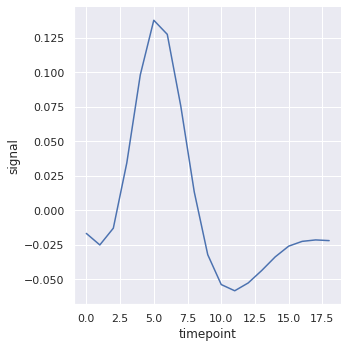

In [ ]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

- 또한 ci=sd로 표현하면 신뢰구간과 관계없이 전체 통계값을 보여준다

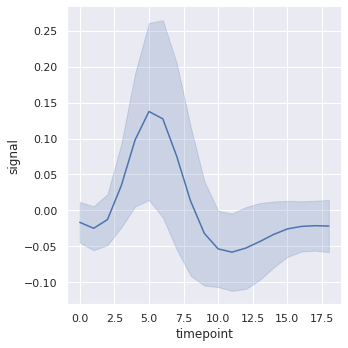

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

- 위와 같은 기능을 사용하고 싶지 않으면 estimator=None 옵션을 부여하자
- 이럴 경우 X에 해당하는 Y값 전체를 사용해 선형 그래프를 그리게 된다

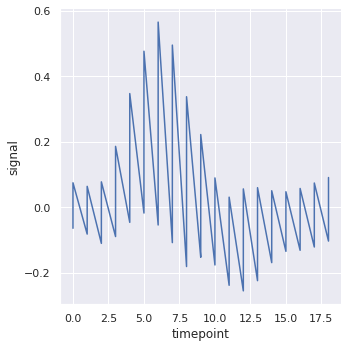

In [ ]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

- 선형그래프도 산점도와 마찬가지로 hue, size, style 등을 이용해 제3의 변수를 표현할 수 있다
- 동일한 그림에 점의 색깔만 바뀌었던 산점도와 달리 선형그래프에서 Hue를 제시할 경우에는 기준에 따른 2개의 다른 선을 그리게 된다

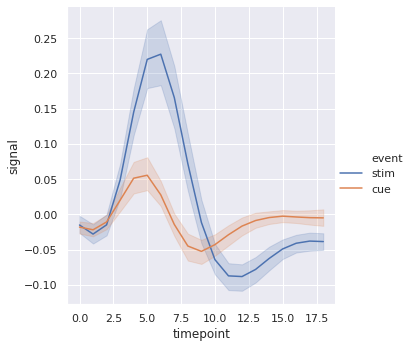

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

- 앞서 산점도와 마찬가지로 Hue는 변수의 종류에 따라 적용되는 기본색이 달라진다
- 아래는 Hue의 기준이 되는 변수로 숫자형 변수를 제시한 경우이다

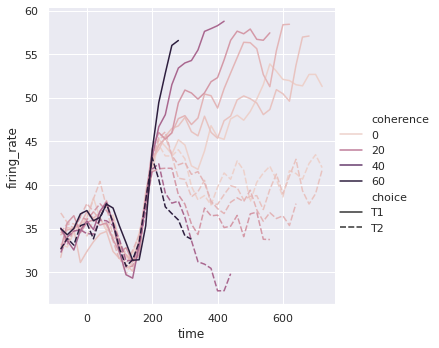

In [ ]:
dots = sns.load_dataset('dots').query('align == "dots"')
sns.relplot(x='time', y='firing_rate', hue='coherence', style='choice',
            kind='line', data=dots);

- 숫자형 변수를 Hue로 지정할 경우 색의 구분이 명확하지 않을 때가 있다
- 이런 경우 Hue값의 범주를 직접 제시해 색깔에 차이를 둘 수 있다
- 색깔에 값을 입력하는 방법으로는 [다음](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html)을 참조하자

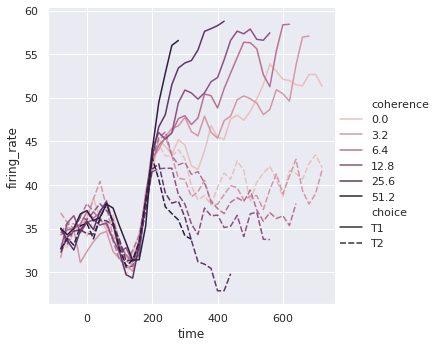

In [ ]:
palette = sns.cubehelix_palette(light=.8, n_colors=6) #sns.cubehelix_palette는 color map을 만드는 기능
sns.relplot(x='time', y='firing_rate', hue='coherence', style='choice',
            palette=palette, kind='line', data=dots);

- 여기에서 더 나아가 Style값을 제시하면 색, 스타일 두 가지 변수에 따라 총 4개의 선을 그린다

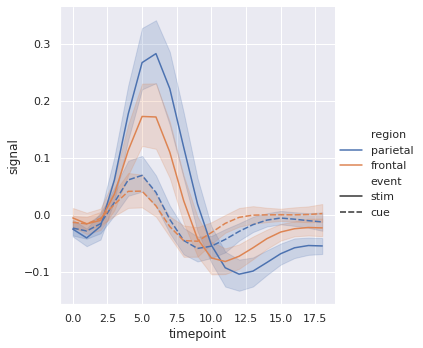

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri);

- 아래와 같이 마커(Markers)를 주면 데이터를 가시적으로 구분하는데 도움이 된다
- 마커와 함께 사용하는 기능은 대쉬(Dashes)이다 Dashes=True값을 주면 마커를 연결하는 선이 실선, 점선으로 구분된다

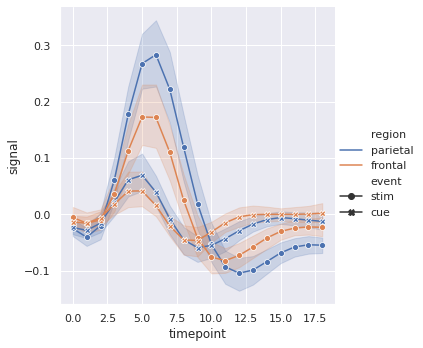

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

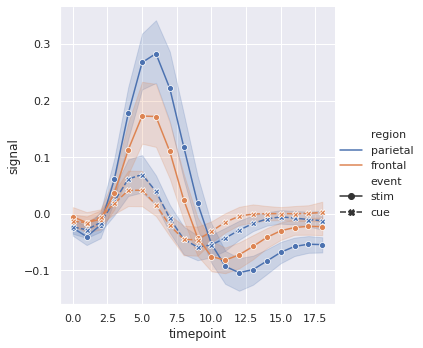

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=True, markers=True, kind="line", data=fmri);

- 위의 그래프에서 볼 수 있듯이 선형그래프는 여러 변수 정보를 담을 경우 오히려 그래프를 이해하기 어려워진다
- 그렇기 때문에 많은 변수를 담으려하기 보다는 두 개의 변수를 여러 옵션들로 구분해 차이를 두는 것이 오히려 더 바람직하다

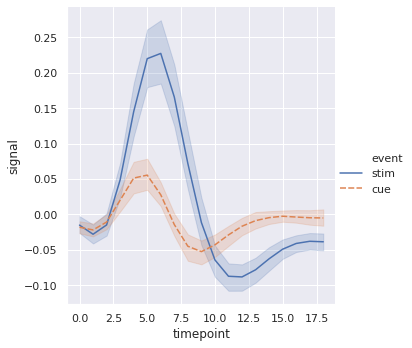

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", kind="line", data=fmri);

- 선형 그래프에서 사이즈(Size) 값을 제시하는 경우에는 선의 두께가 달라진다

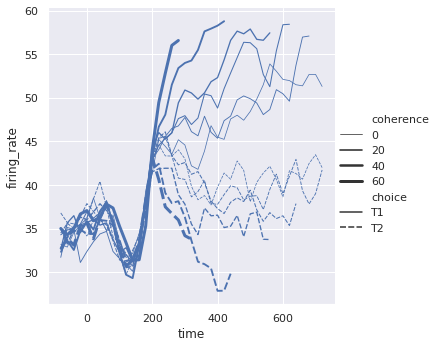

In [ ]:
sns.relplot(x='time', y='firing_rate', size='coherence', style='choice',
            kind='line', data=dots);

- 산점도에서 설명한 바와 같이 사이즈는 일반적으로 숫자형 변수를 나타내는 것이 일반적이다
- 아래와 같이 범주형 변수에도 사용될 수 있지만 이때는 선의 의미가 모호해지기 때문에 사용을 지양하는 것이 옳다

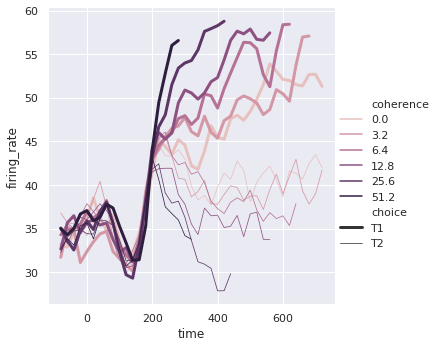

In [ ]:
sns.relplot(x='time', y='firing_rate',hue='coherence', size='choice',
           palette=palette, kind='line', data=dots);

- 애초에 선형 그래프는 시간에 따른 측정값의 변화를 보여주는데 최적화 되어있음을 기억하자

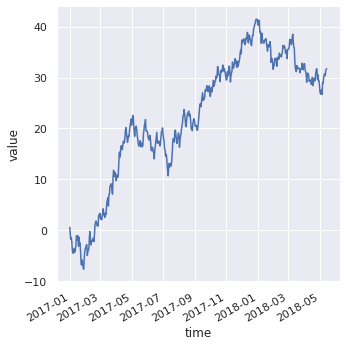

In [ ]:
df = pd.DataFrame(dict(time=pd.date_range('2017-1-1', periods=500), #2017년 1월 1일부터 500일 뒤까지 값을 추출
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate() #시간이 겹치지 않게 해주는 함수

### 1-3) 다차원그래프(Multiple Facets)
- 지금까지 살펴본 산점도와 선형그래프는 공통적으로 col, row옵션을 가진다
- col, row에 변수를 제시하면 기준이 되는 변수에 따라 서로 다른 도표를 그려 관계를 나타낸다
- 도표가 많아질 수록 전체 그림의 크기가 커지기 때문에 height, aspect를 통해 크기를 조절해주는 과정 또한 필요하다

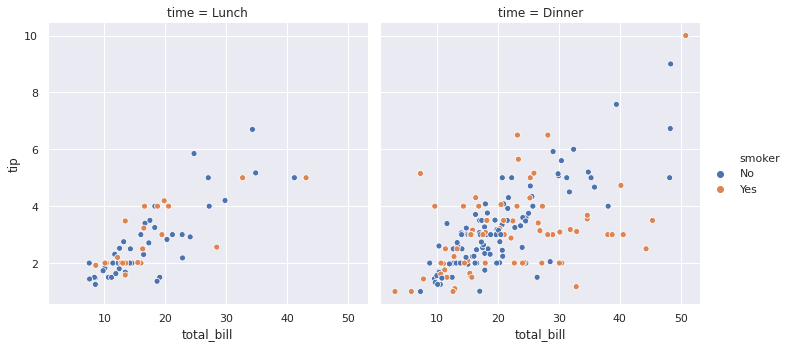

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips); #Time을 기준으로 열에 2개의 그래프를 그림

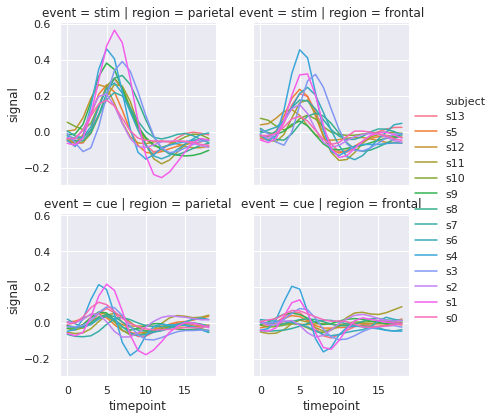

In [ ]:
sns.relplot(x='timepoint', y='signal', hue='subject',col='region', row='event', height=3,
            kind='line', estimator=None, data=fmri);

## 2) 범주형 변수(Categorical Data)
- Seaborn의 Catplot()기능을 활용해 범주형 변수를 도표로 나타내보자
- Catplot의 종류는 아래와 같이 나뉜다. 변수로 하고 싶은 작업에 대해 생각해보면 어떤 도표를 활용해야할지 정할 수 있을 것이다

- 범주형 산점도(Categorical scatterplots)

  + Stripplot, Swarmplot

- 범주형 분포도(Categorical distribution)

  - Boxplot, Violinplot, Boxenplot

- 범주형 추정치(Categorical estimate)

  - Pointplot, Barplot, Countplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)

### 2-1) 범주형 변수 산점도(ScatterPlot)

#### 1) Catplot
- Catplot()의 기본값은 산점도 그 중에서도 기본은 Stripplot이다
- Stripplot은 카테고리에 해당하는 값 모두를 동일한 위치에 표현한다
- kind='strip'으로 표시할 수도 있다

In [ ]:
tips = sns.load_dataset('tips')
print(tips.head(3))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3


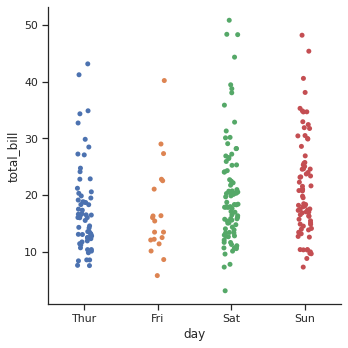

In [ ]:
sns.catplot(x='day',y='total_bill',data=tips);

- Stripplot도 Jitter옵션을 통해 Plot을 퍼뜨리는 것이 가능하다
- Jitter에 False값을 주게되면 아래와 같이 일렬로 Plot이 배열된다

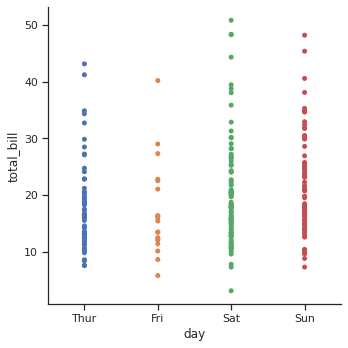

In [ ]:
sns.catplot(x='day',y='total_bill',jitter=False,data=tips);

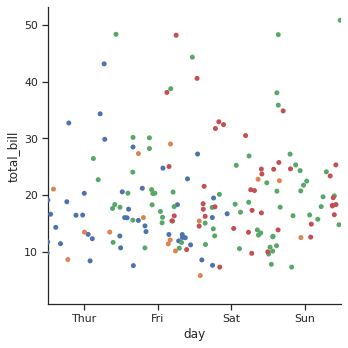

In [ ]:
sns.catplot(x='day',y='total_bill',jitter=2,data=tips); #jitter값에 임의의 숫자를 넣어도 되나 1이상을 넣지 않는 것을 추천한다

#### 2) Swarmplot
- Swarmplot은 표시들이 서로 겹치지 않게 도표를 그린다
- 값이 모두 퍼지기 때문에 데이터셋이 적은 경우에 적합하다
- kind = 'swarm'으로 표시한다

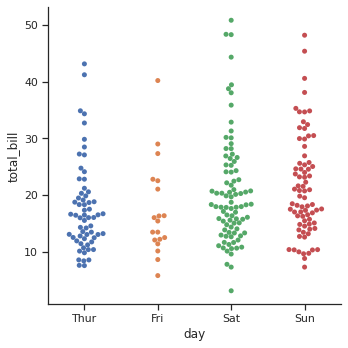

In [ ]:
sns.catplot(x='day',y='total_bill',kind='swarm',data=tips);
#아래 결과를 보면 Day가 자동으로 목요일부터 일요일까지 순차적으로 정렬된 것을 확인할 수 있다
#이처럼 Catplot()은 자체적으로 Catplot을 일정한 순서로 배열해 도표로 그리는 기능을 보유한다

- Relplot()에서와 마찬가지로 범주형 변수 또한 Hue를 통해 제 3의 변수를 나타낼 수 있다

- 그러나 Size, Styple과 같은 옵션은 지원하지 않는다

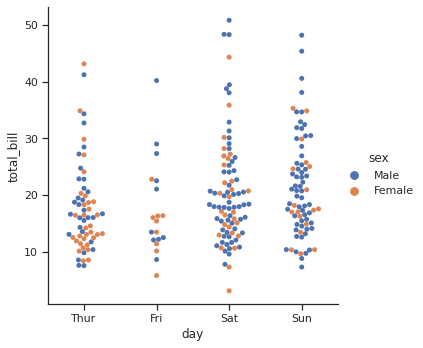

In [ ]:
sns.catplot(x='day',y='total_bill',hue='sex',kind='swarm',data=tips);

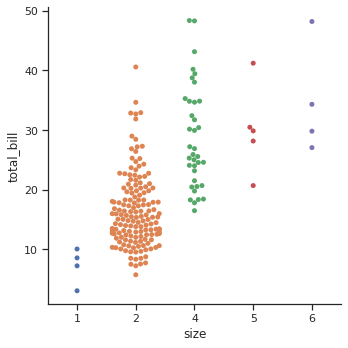

In [ ]:
sns.catplot(x='size',y='total_bill',kind='swarm',data=tips.query('size != 3'));
#아래를 보면 size의 순서대로 데이터가 분류되어 나타난 것을 확인할 수 있다

- Order이라는 옵션에 리스트로 순서를 제공하면 변수의 순서를 지정할 수 있다

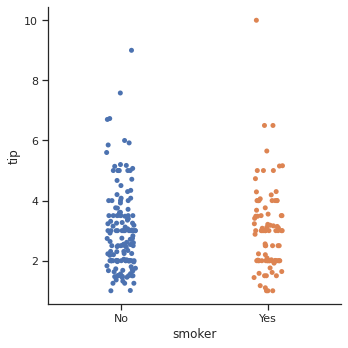

In [ ]:
sns.catplot(x='smoker',y='tip',order=['No','Yes'],data=tips);

- 독립변수를 Y축에 표시할 수도 있다
- 표시될 값 범주가 넓은 경우엔 이처럼 도표를 그리는 것이 유용할 수도 있다

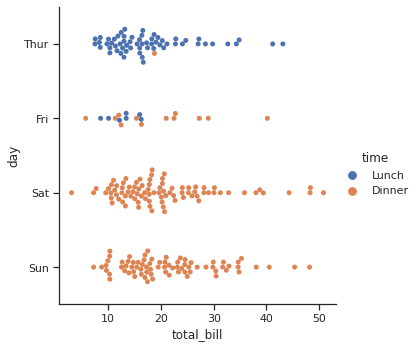

In [ ]:
sns.catplot(x='total_bill',y='day',hue='time',kind='swarm',data=tips);

### 2-2) 범주형 변수 분포도(Distribution)
- Dataset이 커질 경우, 산점도나 선형 그래프로 분포를 표현하는 데에 한계가 생긴다
- 이럴 경우 Category별로 분포 정보를 요약해 나타내는 몇가지 방법을 사용한다

#### 1) Boxplot
- 분포를 요약해 보여주는 대표적인 방법은 Boxplot이다
- 4분위수와 함께 1사분위 3사분위 수에 X1.5를 한 값을 보여주며, 극단값을 별도로 표시해준다 

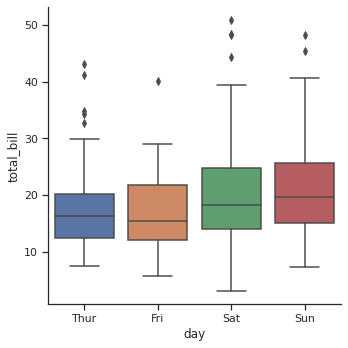

In [ ]:
sns.catplot(x='day',y='total_bill',kind='box',data=tips);

- 다른 도표와 마찬가지로 hue를 통해 제 3의 변수를 표시할 수 있다
- Hue에 입력된 값을 기준으로 새로운 Box를 그린다는 특징이 있다

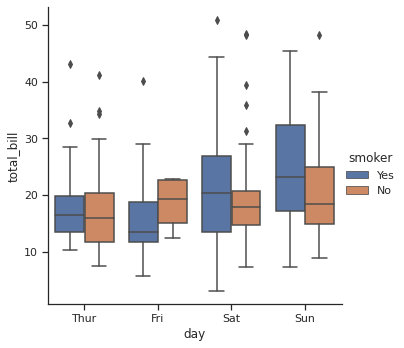

In [ ]:
sns.catplot(x='day',y='total_bill',hue='smoker',kind='box',data=tips);

- 위 도표를 보면 hue로 기준으로 나눠진 상자들은 서로 겹쳐지지 않는 것을 확인할 수 있다. 이런 기능을 Dodging이라고 한다
- 보통 Dodge옵션에 False값을 주면 상자끼리 서로 겹치게 된다
- 하지만 배타적인 항목의 경우 Dodge를 False로 두어 색의 차이를 둘 수도 있다

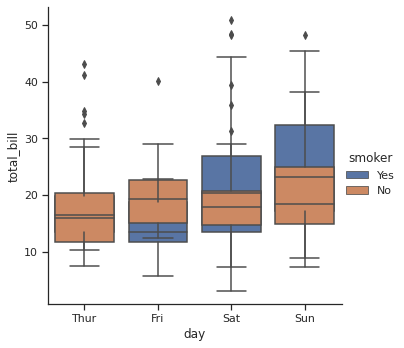

In [ ]:
sns.catplot(x='day',y='total_bill',hue='smoker',kind='box', dodge = False, data=tips);

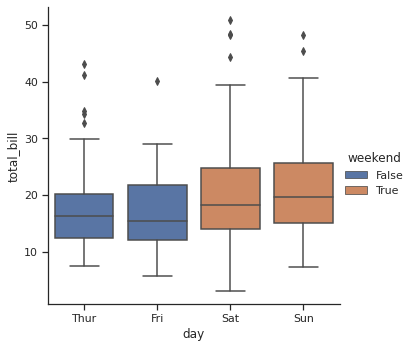

In [ ]:
tips['weekend'] = tips['day'].isin(['Sat','Sun'])
sns.catplot(x='day',y='total_bill',hue='weekend',kind='box',dodge=False,data=tips);
#주말과 평일은 겹치지 않기 때문에 깔끔하게 도표가 그려진다

#### 2) Boxenplot
- Boxenplot은 Boxplot과 유사하지만 분포를 더 시각적으로 보여준다 
- 크기가 큰 dataset에 적합하다

In [ ]:
diamonds = sns.load_dataset('diamonds') #Seaborn의 diamonds데이터셋을 불러온다
print(diamonds.head(3))

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31


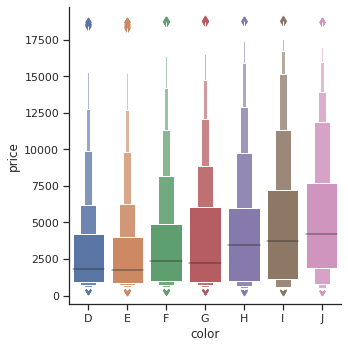

In [ ]:
sns.catplot(x='color',y='price',kind='boxen',data=diamonds.sort_values('color'));
#sort_values 옵션을 주면 color 값을 기준으로 그래프를 그린다

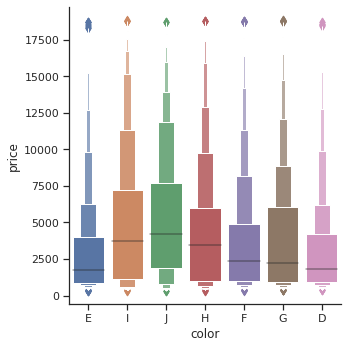

In [ ]:
sns.catplot(x='color',y='price',kind='boxen',data=diamonds);
#옵션을 제외한 경우에는 color의 순서로 그래프가 정렬되지 않음을 볼 수 있다

#### 3) Violinplot
- Violinplots은 위의 두 도표와 달리 Kernel Density(KD)정보를 도표에 포함하고 있다

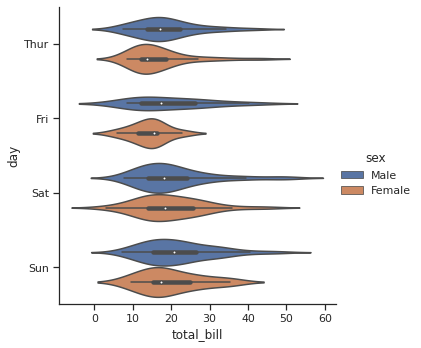

In [ ]:
sns.catplot(x='total_bill',y='day',hue='sex',kind='violin',data=tips);

- 같은 정보를 Boxenplot으로 표현하면 아래와 같다

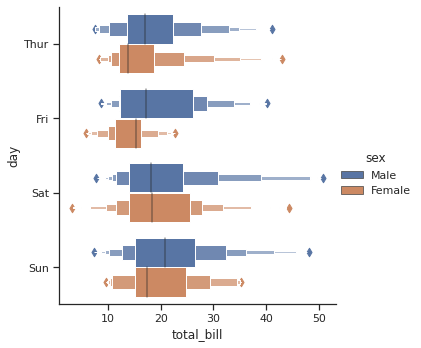

In [ ]:
sns.catplot(x='total_bill',y='day',hue='sex',kind='boxen',data=tips);

- KD에 대한 부가적인 설명은 [다음](https://mathisonian.github.io/kde/)을 참조하자
- KD에 줄 수 있는 다양한 옵션 중 Bandwidth(BW)는 도표를 부드럽게 그리는 정도에 대한 것이다
- BW에 들어가는 숫자가 클 수록 그래프가 뭉퉁그려진다




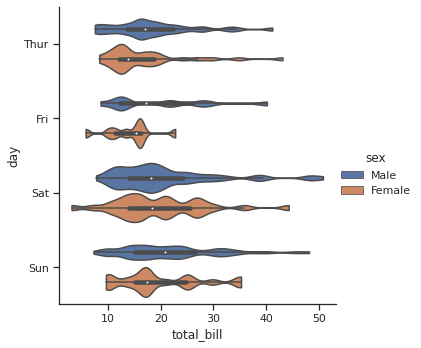

In [ ]:
sns.catplot(x='total_bill',y='day',hue='sex',kind='violin',bw=.15,cut=0,data=tips);

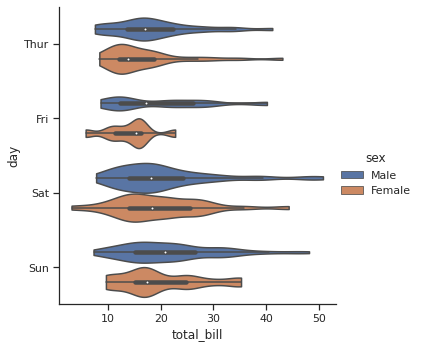

In [ ]:
sns.catplot(x='total_bill',y='day',hue='sex',kind='violin',bw=.3,cut=0,data=tips);

- Split옵션에 True값을 주면 별개의 도표를 그리지 않고 하나의 Violin을 분할해서 그림을 그린다

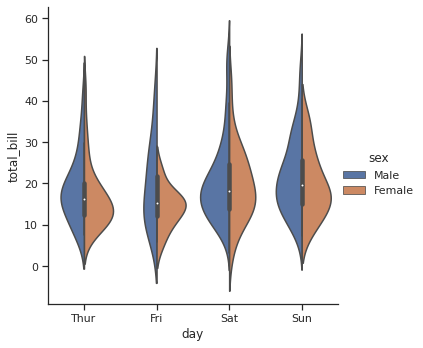

In [ ]:
sns.catplot(x='day',y='total_bill',hue='sex',kind='violin',split=True,data=tips);

- 그 외 Violin에 줄 수 있는 다양한 옵션을 알아보자
  + Inner = 바이올린 안에 표시를 주는 것이다 [box, quartile, point, stick] 옵션이 있다
  + Palette = 바이올린에 색을 부여하는 기능이다

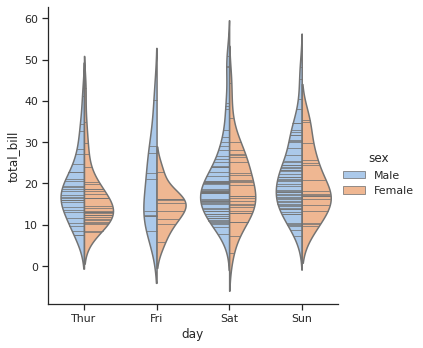

In [ ]:
sns.catplot(x='day',y='total_bill',hue='sex',kind='violin',inner='stick',split=True,
            palette='pastel',data=tips);

- 아래는 Inner 옵션을 다양하게 넣어본 도표이다

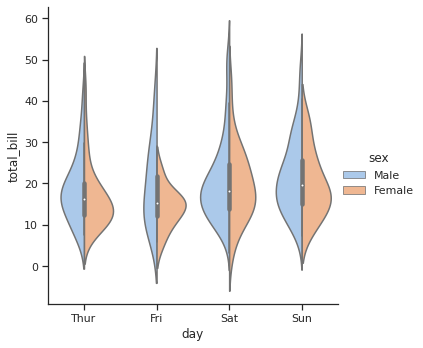

In [ ]:
sns.catplot(x='day',y='total_bill',hue='sex',kind='violin',inner='box',split=True,
            palette='pastel',data=tips);

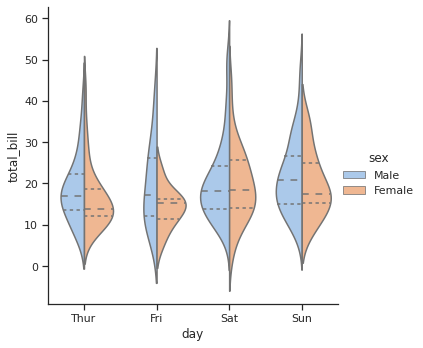

In [ ]:
#quartile은 4분위 값을 표시해준다
sns.catplot(x='day',y='total_bill',hue='sex',kind='violin',inner='quartile',split=True,
            palette='pastel',data=tips);

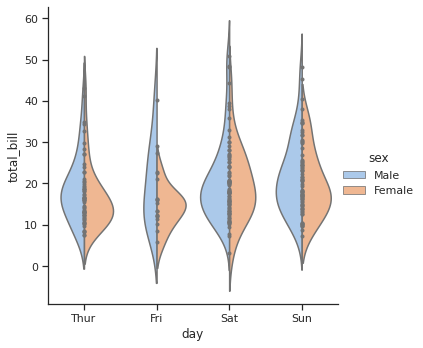

In [ ]:
sns.catplot(x='day',y='total_bill',hue='sex',kind='violin',inner='point',split=True,
            palette='pastel',data=tips);

- Violinplot은 Swarmplot과 같이 다른 도표와 함께 사용하는 것이 가능하다
- ax옵션을 사용한다, 이때 ax = Axes object to draw the plot onto라고 정의된다

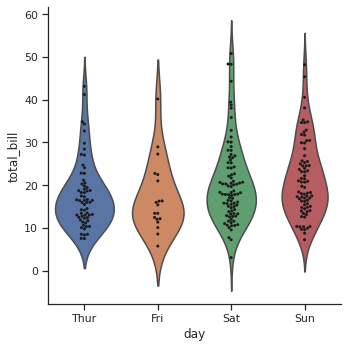

In [ ]:
g = sns.catplot(x='day',y='total_bill',kind='violin',inner=None,data=tips);
sns.swarmplot(x='day',y='total_bill',color='k',size=3,data=tips,ax=g.ax);

### 2-3) 통계적 추정치(Estimates)
- 단순한 분포가 아니라 대표값에 대한 정보를 제공하고 싶을 때가 있다
- 이때 Seaborn의 Bar, Pointplot을 사용하면 위 정보를 표현할 수 있다

#### 1) Barplot
- 막대 그래프는 데이터셋 전체를 다루며, 평균을 중심으로 도표를 그린다

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic') #seaborn에서 titanice데이터셋을 불러온다
print(titanic.head(3))

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True

[3 rows x 15 columns]


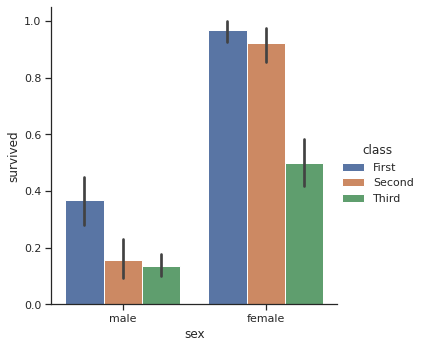

In [ ]:
sns.catplot(x='sex',y='survived',hue='class',kind='bar',data=titanic);

- 막대 그래프의 경우에는 위처럼 두 개의 변수를 활용해 도표를 그릴 수도 있지만
- 하나의 변수를 기준으로 값을 Count해 도표를 그릴 수도 있다 
- 히스토그램과 유사한 위 기능은 Countplot()을 통해 사용한다 Countplot은 Y값을 지정해주지 않음에 유의한다

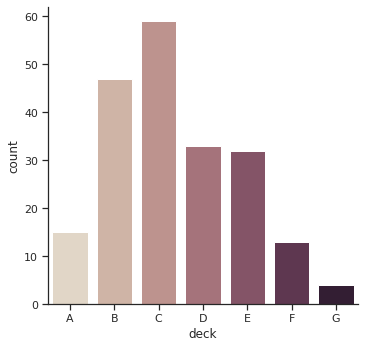

In [ ]:
sns.catplot(x='deck',kind='count',palette='ch:.25',data=titanic);

#### 2) Pointplot
- Pointplot은 막대그래프와 달리 추정치와 신뢰구간에 대한 정보를 포함한다
- 독립변수에 따라 종속변수가 어떻게 변화하는지 파악하기 위해 사용한다

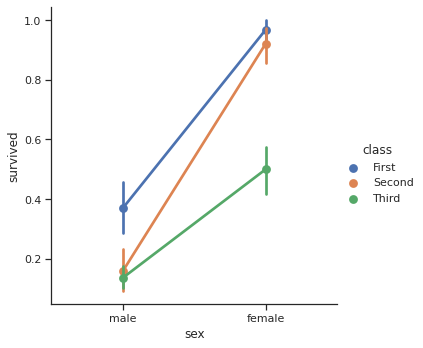

In [ ]:
sns.catplot(x='sex',y='survived',kind='point',hue='class', data=titanic);

- 마커와 선의 종류 또한 옵션으로 변경 가능하다
- Makers와 Linestyles 옵션을 사용하면 되며 옵션은 딕셔너리나 리스트 형태로 부여한다

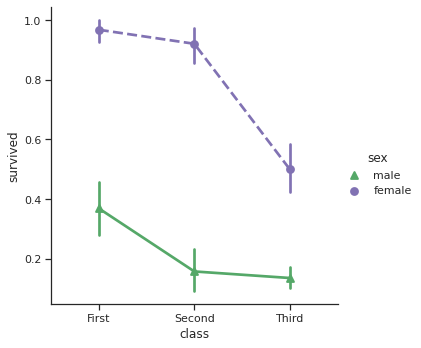

In [ ]:
sns.catplot(x='class',y='survived',hue='sex',palette={'male':'g','female':'m'},
            markers=['^','o'],linestyles=['-','--'],kind='point',data=titanic);

### 2-4) 다차원그래프(Multiple Facets)
- 앞서 Relplot과 마찬가지로 Catplot 또한 다수의 도표를 다중관계를 보여줄 수 있다
- Col, Row값을 입력하면 여러 개의 그래프를 그려 여러 변수 간의 관계를 보여준다
- 단 여러 개의 그래프를 그릴 때에는 aspect와 같은 옵션을 통해 크기를 조절해주어야 함을 기억하자

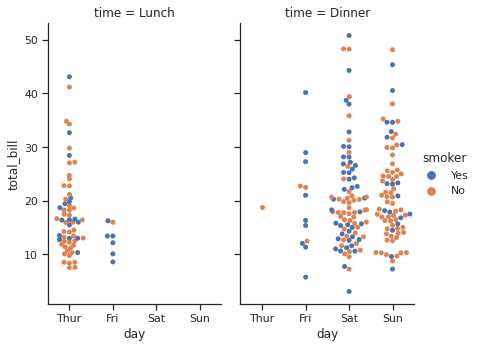

In [ ]:
tips = sns.load_dataset('tips')
sns.catplot(x='day',y='total_bill',hue='smoker',col='time',aspect=.6,kind='swarm',data=tips);

- Orient = orientation of the plot(vertical or hotizontal)
- 즉 도표를 어떤 방향으로 배치할 것인지에 대한 것이다
- 주로 Numeric변수나 Number와 연관있는 카테고리 변수에 사용한다

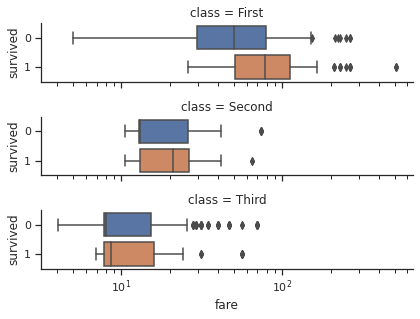

In [ ]:
g=sns.catplot(x='fare',y='survived',row='class',kind='box',orient='h',height=1.5, aspect=4,
              data=titanic.query('fare > 0'))
g.set(xscale='log');
#seaborn.set은 aesthetic parameter를 설정하는 기능이라고 한다
#위처럼 넣으면 x값이 log값으로 들어가는 것 아닐까

## 3) 데이터셋의 분포 다루기(Distribution of Dataset)
- 데이터셋을 다루는 데에 있어서 중요한 것은 값의 분포를 확인하는 것
- 본 장에서는 숫자형 변수의 분포를 확인하는 법을 알아볼 것이다

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### 3-1) 일변량 분포도(Univariate Distributions)
- 일변량이란 데이터 셋이 하나의 변수만을 가지는 경우를 의미
- Distplot()을 활용하면 일변량 분포도를 그릴 수 있다

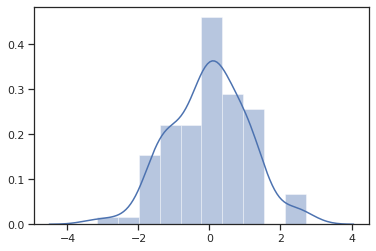

In [ ]:
x=np.random.normal(size=100)
sns.distplot(x);

#### 1) Histogram
- 히스토그램은 데이터에 기반해 축을 구성하고 
- 부분별로 포함된 데이터의 갯수를 막대(Bins)로 표시한다
- 어떻게 보면 범주형 변수의 Countplot()과 유사하게 생각할 수도 있을 것 같다
- 히스토그램은 옵션을 통해 Rugplot을 도표에 추가해줄 수 있다
  + Rug? plot of data for a single quantitative variable, displayed as marks along an axis

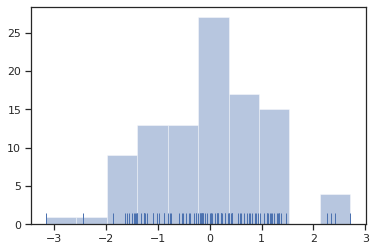

In [ ]:
sns.distplot(x, kde=False, rug=True);

- 히스토그램에서 막대의 수는 데이터셋을 세분화하는 정도와도 같다
- Seaborn은 기본적으로 최적의 막대 수를 계산해 표시하지만 임의로 막대의 수를 변경하는 것도 가능하다

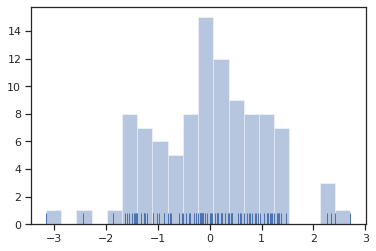

In [ ]:
sns.distplot(x, bins=20, kde=False, rug=True);

#### 2) Kernel Density Estimation(KDE) 
KDE는 높이를 나타낸 선으로 데이터의 분포를 보여주는 도표이다

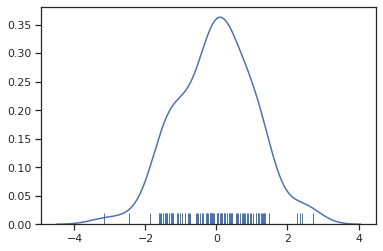

In [ ]:
sns.distplot(x, hist=False, rug=True);

- 본래 KDE는 그리는 과정이 매우 복잡하다
  + 1) 모든 관측치를 가우시안 곡선으로 표시한다
  + 2) 가우시안 곡선의 밀도를 하나의 곡선(KDE)으로 표시한다
- Seaborn의 Kdeplot()은 위 과정을 자체적으로 거쳐 시각화를 진행한다
- 실제 과정을 따라 도표를 그린 것은 아래와 같다

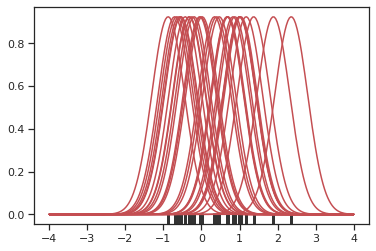

In [ ]:
#gaussian curve 그리기
x=np.random.normal(0,1,size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1/5.)
support = np.linspace(-4,4,200)

kernels = []
for x_i in x:
  kernel = stats.norm(x_i, bandwidth).pdf(support)
  kernels.append(kernel)
  plt.plot(support,kernel,color='r')

sns.rugplot(x, color = '.2', linewidth=3);

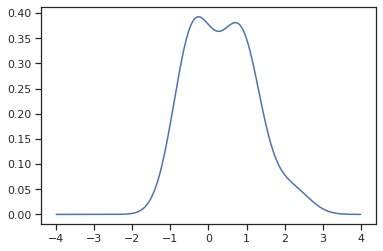

In [ ]:
#곡선을 하나로 통합하기
from scipy.integrate import trapz
density = np.sum(kernels, axis = 0)
density/=trapz(density,support)
plt.plot(support,density);

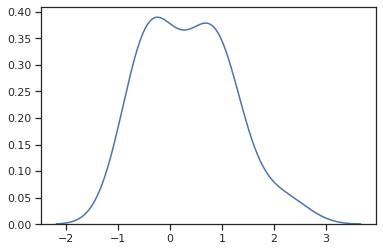

In [ ]:
#seaborn의 kdeplot()을 이용하면 위 과정이 한 문장으로 정리된다
sns.kdeplot(x, shade=False);

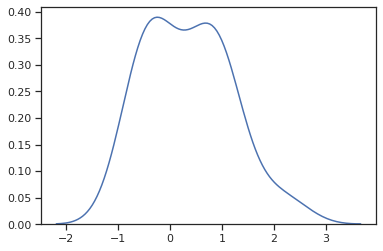

In [ ]:
#물론 distplot()을 써도 마찬가지
sns.distplot(x, hist=False);

- KDE에서 BandWidth(BW)는 히스토그램의 막대 수와 같은 기능을 한다 
- 즉 BW가 작을수록 더욱 세밀하게 데이터셋의 표현하게 된다

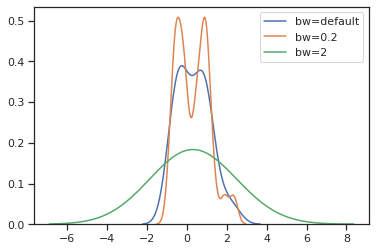

In [ ]:
sns.kdeplot(x, label='bw=default')
sns.kdeplot(x, bw=.2, label='bw=0.2')
sns.kdeplot(x, bw=2, label='bw=2')
plt.legend();

- KDE는 기본적으로 전체 관측값을 보여주는 도표이다
- 하지만 Cut옵션을 사용하면 도표의 일부분만 보여주게 할 수 있다

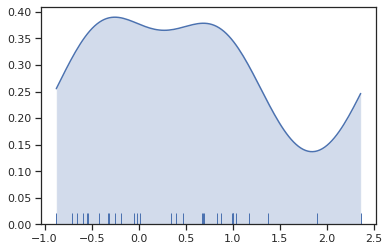

In [ ]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

- Distplot()은 실제 관측값과 parametric distribution간의 유사성을 확인하는 기능도 제공한다
  + Parametric Distribution = 자료의 분포에 있어서 특정 값을 가정하는 것
- Distplot()의 Fit기능을 사용하면 된다
  + Fit = returning a tuple that can be passed to a pdf method a positional arguments

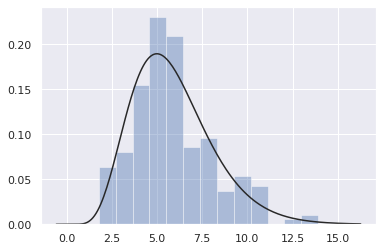

In [ ]:
x= np.random.gamma(6,size=200) #여기서 KDE곡선은 gamma곡선을 의미
sns.distplot(x, kde=False, fit=stats.gamma);

### 3-2) 이변량 분포도(Bivariate Distributions)
- 이변량이란 종속변수가 두개의 독립변수의 영향을 받는 것을 의미한다
- Seaborn의 Jointplot()을 사용하면 이변량 분포도를 그릴 수 있다

In [ ]:
mean, cov = [0,1], [[1,.5],[.5,1]] #covariance=공분산
data = np.random.multivariate_normal(mean, cov, 200)
#np.random.multivariate_normal = Draw random samples from a multivariate normal distribution
#이렇게 하면 평균이 0이고 공분산이 [1,.5]인 분포 하나(X)
#평균이 1이고 공분산이 [.5,1]인 분포 하나(Y)가 나오게 된다
df = pd.DataFrame(data, columns=['x','y'])
print(df.head(3))

          x         y
0  0.037504  1.386030
1  0.286623  2.573465
2 -0.192608 -0.307694


#### 1) Scatter Plot
- 산점도를 활용해 두 변수를 표현할 수 있다

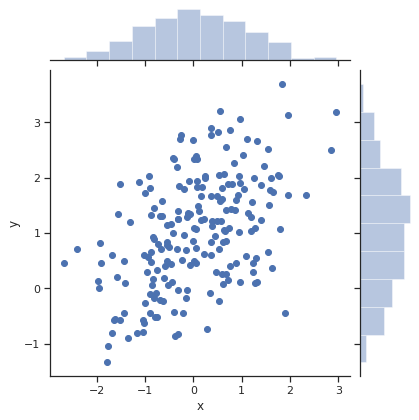

In [ ]:
sns.jointplot(x='x',y='y',data=df);

#### 2) Hexbin Plot
- 점뿐만 아니라 색을 활용해 분포의 밀도까지 확인할 수 있다
- 데이터셋이 클 때 사용하면 효율적이다

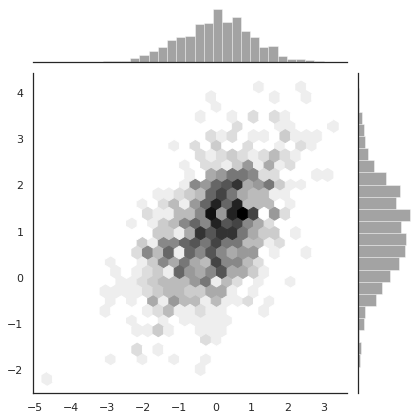

In [ ]:
x,y = np.random.multivariate_normal(mean, cov, 1000).T

with sns.axes_style('white'): # with문을 이용해서 축의 스타일을 지정해줄 수도 있음을 기억하자
  sns.jointplot(x=x,y=y, kind='hex',color='k');

- 스타일을 지정해주지 않으면 도표의 축에서 차이가 있음
  + axes_style = This affects things like the color of the axes,
  + whether a grid is enabled by default, and other aesthetic elements라고 한다

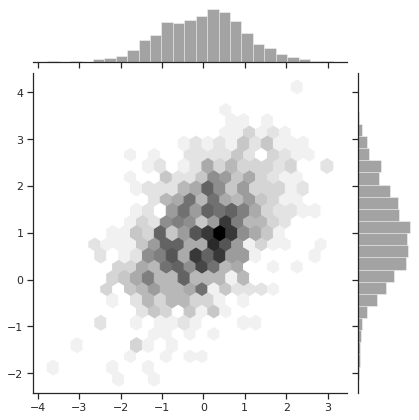

In [ ]:
x,y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x,y=y, kind='hex',color='k');

#### 3) Kernel Density Estimation(KDE)
- KDE를 사용해 다차원적인 자료를 표현할 수도 있다
- 이때 선은 등고선과 같이 그려지는 것이 일반적이다

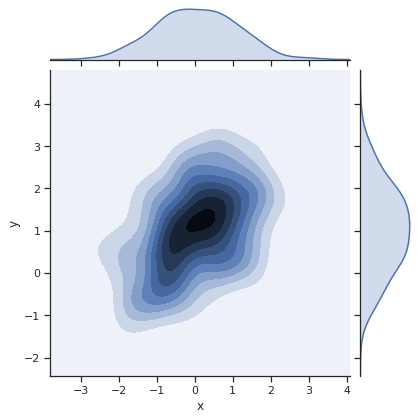

In [ ]:
sns.jointplot(x='x',y='y',data=df,kind='kde');

- Jointplot이 아니라 Kdeplot을 이용해 그림을 그릴 수도 있다

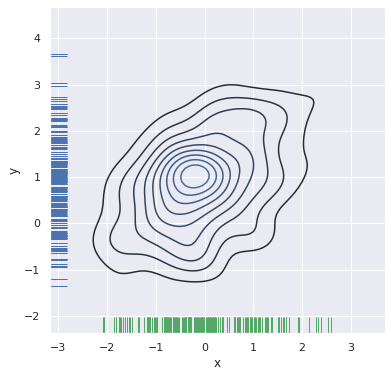

In [ ]:
f,ax = plt.subplots(figsize=(6,6))
sns.kdeplot(df.x,df.y,ax=ax)
sns.rugplot(df.x, color='g',ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax); #Y축에 대한 정보이기 때문에 vertical = True를 한다

- Kdeplot은 데이터셋을 인풋으로 받기 때문에 아래와 같이 식을 주면 인식하지 못한다

In [ ]:
f,ax = plt.subplots(figsize=(6,6))
sns.kdeplot(x='x', y='y', data= df, ax=ax) 
sns.rugplot(df.x, color='g',ax=ax)
sns.rugplot(df.y, vertical=False, ax=ax); #vertical해줘야 y축에 rugplot이 그려짐

- 연속적인 분포를 보여주고 싶다면 KDE에서 Contour Level을 높여주면 된다
- 색을 부여하는 방법은 아래와 같다
  + sns.cubehelix_palette = cubehelix system 내에서 연속적인 Palette를 만든다
  + as_cmap=True로 하면 색깔리스트가 아니라 matplotplib colormap을 반환한다
  + reverse=True로 하면 색이 어두운 것에서부터 밝은 것으로 표시된다

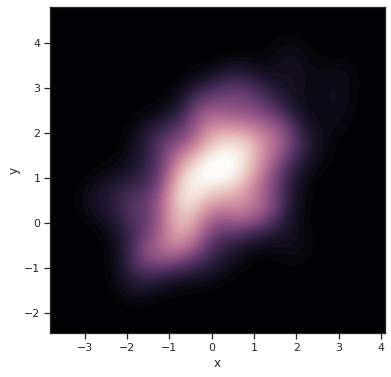

In [ ]:
f, ax= plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True) #색을 지정
sns.kdeplot(df.x,df.y,cmap=cmap,n_levels=60, shade=True); #지정된 색을 바탕으로 도표를 그림
#cmap은 colormap을 의미
#n_levels는 kdeplot을 그리는데 있어서 밀도를 나타내는 선의 수를 의미한다

Jointplot()은 Rug와 같이 실제 관측값을 표현하는 JointGrid기능을 제공한다

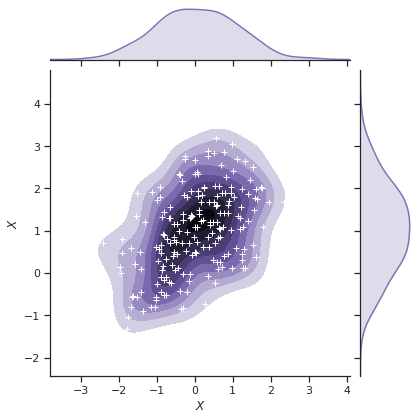

In [ ]:
g = sns.jointplot(x='x',y='y',data=df,kind='kde',color='m')
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+') # 마커의 옴션을 지정
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$X$'); #각 축의 이름을 X,Y로 설정

#### 4) Pairwise Relationship
- 여러 개의 변수 중 2개씩 골라 관계를 확인하고 싶을 때는 Pairplot을 사용한다

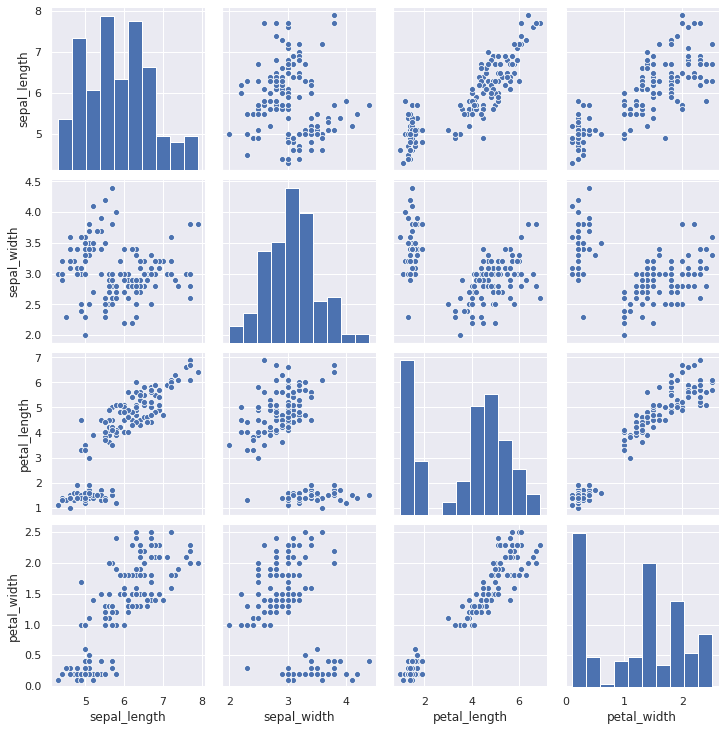

In [ ]:
iris = sns.load_dataset('iris')
sns.pairplot(iris);

- Plot간의 구분을 두고 싶을 때는 Hue를 통해 제3의 변수를 추가할 수 있다

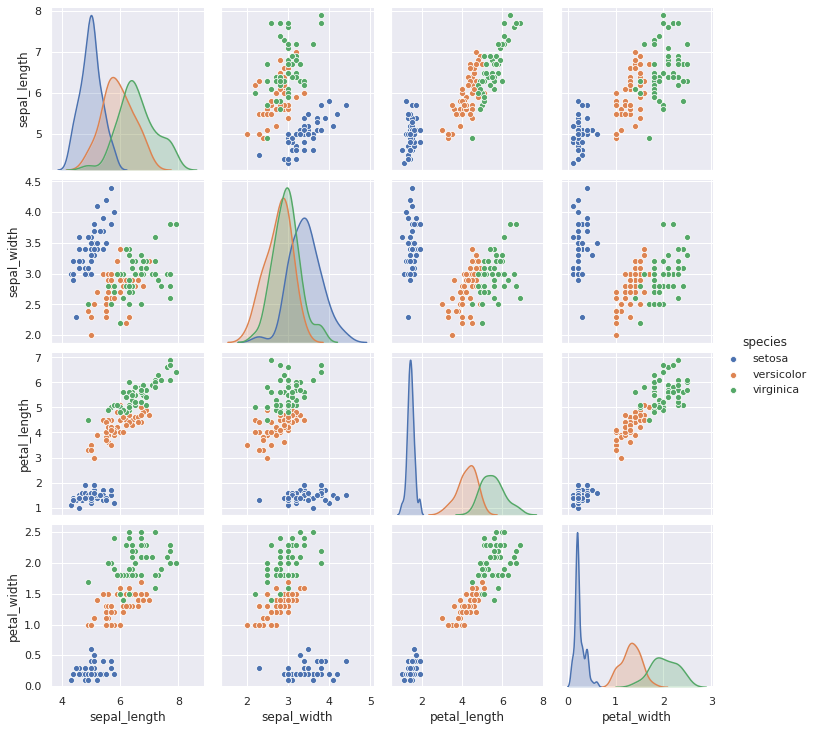

In [ ]:
sns.pairplot(iris, hue="species");

##4) Linear Relationships
- 보통 데이터셋은 여러 개의 양적 변수로 구성되어 있음
- 데이터 분석의 목표는 변수 간의 관계를 확인하는 것
- 그 방법 중 하나가 선형회귀
- seaborn자체는 통계프로그램이 아니기 때문에 정교한 통계를 위해서는 statsmodels를 사용해야 함 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(color_codes=True)
tips=sns.load_dataset('tips')

### 4-1) Linear Regression Model
- 선형 회귀선을 그리는 2가지 방법 : regplot/lmplot
- 두 가지 모두 x,y에 대한 산점도를 그리고 이를 바탕으로 한 회귀선과 95%의 신뢰수준을 보여줌

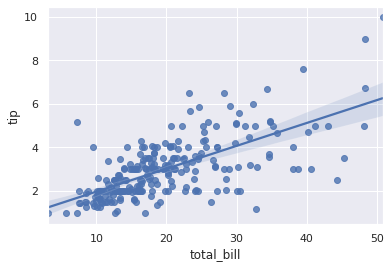

In [ ]:
sns.regplot(x='total_bill',y='tip',data=tips);

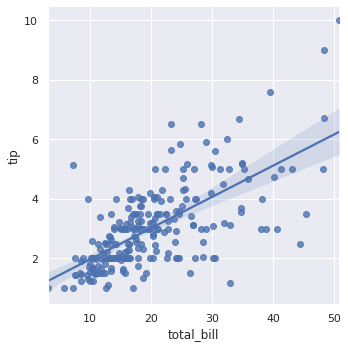

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips);

위에서 regplot/lmplot의 차이는 figure의 차이임을 확인할 수 있음

차이가 나는 이유 = 

regplot = x,y변수를 간단한 numpy형 객체로 파악(Series, DataFrame 등)

lmplot = x,y변수를 string형태로 인식(Long-form, Tidy 데이터)

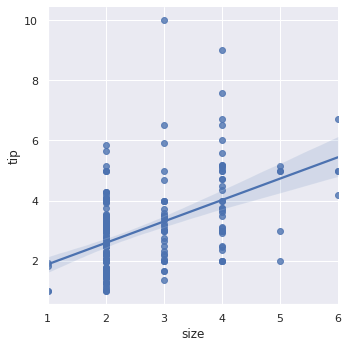

In [ ]:
sns.lmplot(x='size',y='tip',data=tips);

위처럼 변수가 이산형이어도 회귀선을 그을 수는 있으나 시각적으로 유효하지 않음

이때 사용할 수 있는 옵션 중 하나가 jitter임

jitter는 데이터를 얼마나 퍼뜨릴지에 대한 것일 뿐, 회귀선에는 영향을 미치지 않음

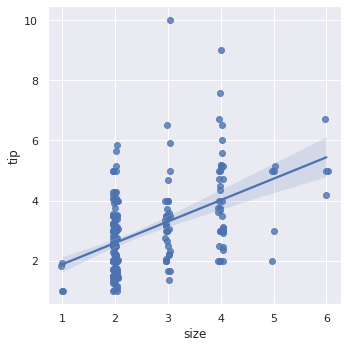

In [ ]:
sns.lmplot(x='size',y='tip',data=tips,x_jitter=.05);

jitter가 아니라 신뢰구간을 통해 시각적인 효과를 줄 수도 있음

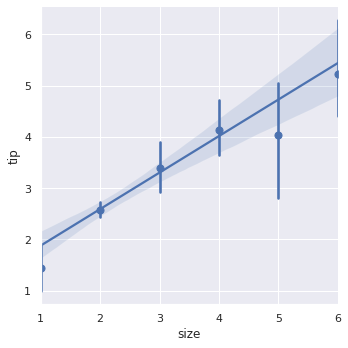

In [ ]:
sns.lmplot(x='size',y='tip',data=tips,x_estimator=np.mean);

### 4-2) Fitting Different Kinds of Model
- 선형 회귀가 유효하지 않은 경우가 존재

In [ ]:
anscombe = sns.load_dataset('anscombe')
print(anscombe.head(3))
print(anscombe.tail(3))

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
   dataset    x     y
41      IV  8.0  5.56
42      IV  8.0  7.91
43      IV  8.0  6.89


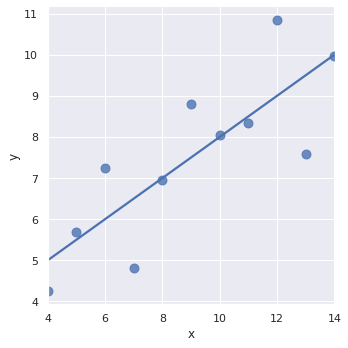

In [ ]:
#아래 경위에는 회귀선이 유효
sns.lmplot(x='x',y='y',data=anscombe.query('dataset== "I"'),ci=None,scatter_kws={'s':80});

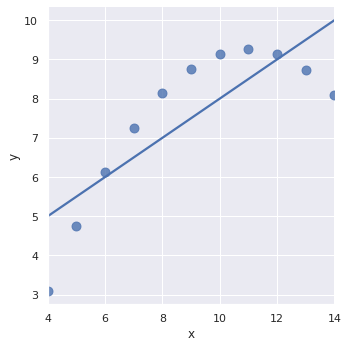

In [ ]:
#아래 경우에는 회귀선이 유효하지 못하다
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80});

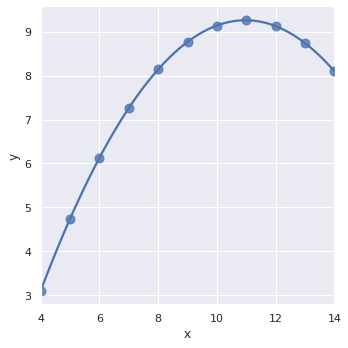

In [ ]:
#이럴 경우 사용할 수 있는 것은 polynomial 회귀모델에 선을 맞추는 것
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),order=2, 
           ci=None, scatter_kws={"s": 80});
#order= order for the lebel of the faceting variables

이상치로 인해 회귀선에 오류가 생길 수도 있다

이럴 경우 robust 명령어를 사용하면 이상치를 반영하지 않는다

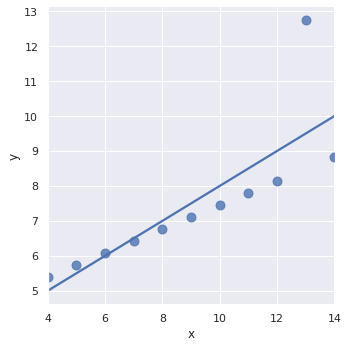

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

robust 명령어를 수행한 뒤 회귀선이 제대로 그어진 것을 확인할 수 있다

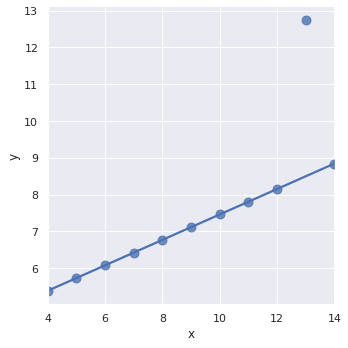

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

### 4-3) Conditioning on other varialbes
- 다른 변수와 마찬가지로 hue를 통해 다른 변수를 포함할 수 있음
- regplot은 언제나 한가지 관계를 보여주는 반면
- lmplot은 facegrid와 함께 해서 선형 관계를 보여줌
- 여기서 가장 자주 쓰이는 기능이 hue

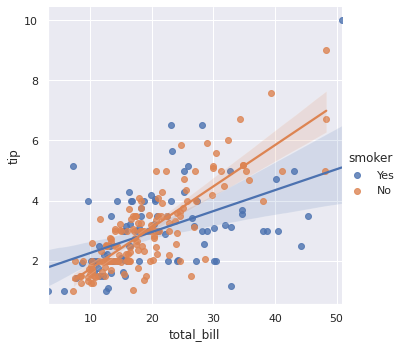

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips);

- 물론 마커를 바꿀 수 있다는 것 또한 동일

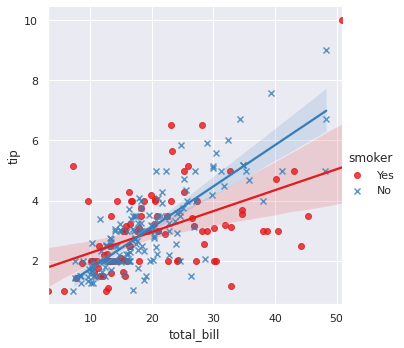

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['o', 'x'], palette='Set1');

모두 앞에서 배운 내용

row와 col을 통해서도 새로운 변수를 추가할 수 있다

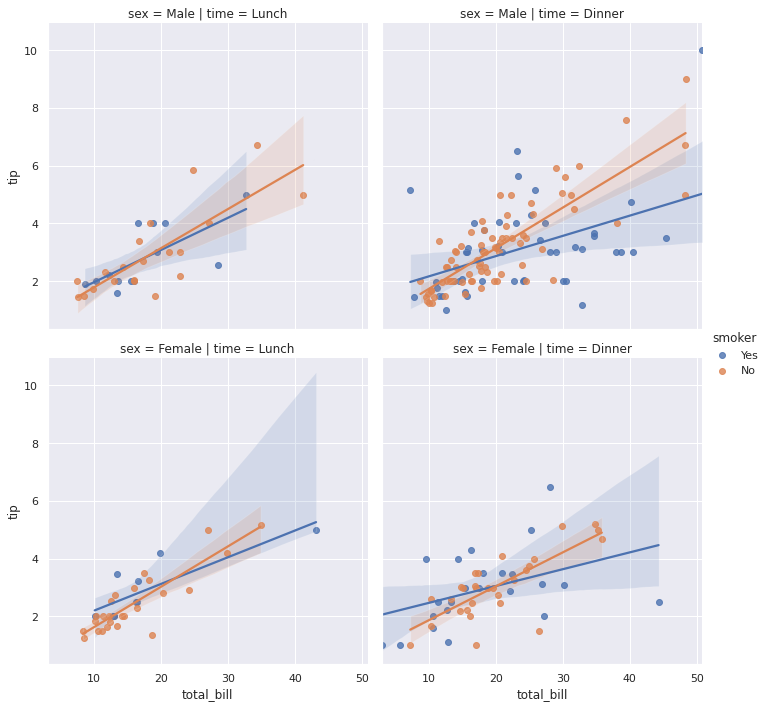

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', row='sex', data=tips);